In [1]:
import pickle
import sympy as sp

In [2]:
import sympy as sp

In [3]:
r= sp.symbols('r')
q=sp.symbols('q')
v=sp.symbols('v')
vp=sp.symbols('vp')
rp=sp.symbols('rp')
qp=sp.symbols('qp')
t=sp.symbols('t')
(ppc)=sp.symbols('(ppc)')
(pdm)=sp.symbols('(pdm)')
(pmp)=sp.symbols('(pmp)')
p_pair=sp.symbols('p_pair')

In [4]:
i_m = sp.symbols('i_m')
j_m = sp.symbols('j_m')
k_m = sp.symbols('k_m')
l_m = sp.symbols('l_m')
G = sp.symbols('G')
g = sp.symbols('g')
a1,a2,b1,b2,a3,a4,b3,b2,b4,c1,c2,c3,c4 = sp.symbols('a1,a2,b1,b2,a3,a4,b3,b2,b4,c1,c2,c3,c4')

In [5]:
modes_base = [[[G, i_m, i_m], [G, i_m, i_m]],
 [[G, i_m, j_m], [G, i_m, j_m]],
 [[G, i_m, i_m], [G, i_m, j_m]],
 [[G, i_m, j_m], [G, i_m, k_m]],
 [[G, i_m, i_m], [G, j_m, i_m]],
 [[G, i_m, j_m], [G, k_m, j_m]],
 [[G, i_m, i_m], [G, j_m, j_m]],
 [[G, i_m, i_m], [G, j_m, k_m]],
 [[G, i_m, j_m], [G, j_m, i_m]],
 [[G, i_m, j_m], [G, j_m, k_m]],
 [[G, i_m, j_m], [G, k_m, l_m]],
 [[G, i_m, i_m], [g, i_m, j_m]],
 [[G, i_m, i_m], [g, j_m, i_m]],
 [[G, i_m, i_m], [g, j_m, k_m]],
 [[G, i_m, j_m], [g, j_m, k_m]],
 [[g, i_m, i_m], [G, i_m, i_m]],
 [[g, i_m, j_m], [G, i_m, j_m]],
 [[g, i_m, i_m], [G, i_m, j_m]],
 [[g, i_m, j_m], [G, i_m, k_m]],
 [[g, i_m, i_m], [G, j_m, i_m]],
 [[g, i_m, j_m], [G, k_m, j_m]],
 [[g, i_m, i_m], [G, j_m, j_m]],
 [[g, i_m, i_m], [G, j_m, k_m]],
 [[g, i_m, j_m], [G, j_m, i_m]],
 [[g, i_m, j_m], [G, j_m, k_m]],
 [[g, i_m, j_m], [G, k_m, l_m]],
 [[g, i_m, i_m], [g, i_m, i_m]],
 [[g, i_m, j_m], [g, i_m, j_m]],
 [[g, i_m, i_m], [g, i_m, j_m]],
 [[g, i_m, j_m], [g, i_m, k_m]],
 [[g, i_m, i_m], [g, j_m, i_m]],
 [[g, i_m, j_m], [g, k_m, j_m]],
 [[g, i_m, i_m], [g, j_m, j_m]],
 [[g, i_m, i_m], [g, j_m, k_m]],
 [[g, i_m, j_m], [g, j_m, i_m]],
 [[g, i_m, j_m], [g, j_m, k_m]],
 [[g, i_m, j_m], [g, k_m, l_m]]]

In [6]:
biv_lst = []

with open("biv/biv_res.out",'rb') as inf:
        res_0_file = pickle.load(inf)

#biv_lst.append([i,[sp.factor(sum([res_0_file[i][0] for i in [3 * j + k for k in range(3)]])) for j in range(4)]])

In [7]:
quad_A_lst = []

with open("quad_A/quad_A_res.out",'rb') as inf:
    res_1_0_file = pickle.load(inf)

#quad_A_lst.append([i,[sp.factor(sum([res_1_0_file[i][0] for i in [24 * j + k for k in range(24)]])) for j in range(4)]])

In [8]:
quad_B_lst = []

with open("quad_B/quad_B_res.out",'rb') as inf:
    res_1_1_file = pickle.load(inf)
    
#quad_B_lst.append([i,[sp.factor(sum([res_1_1_file[i][0] for i in [24 * j + k for k in range(24)]])) for j in range(4)]])

In [9]:
quad_C_lst = []

with open("quad_C/quad_C_res.out",'rb') as inf:
    res_1_2_file = pickle.load(inf)
    
#quad_C_lst.append([i,[sp.factor(sum([res_1_2_file[i][0] for i in [24 * j + k for k in range(24)]])) for j in range(4)]])

In [6]:
import itertools

modes = modes_base

def num_letters_not_Gg(m):
    tmp = [m[0][0],m[0][1],m[0][2],m[1][0],m[1][1],m[1][2]]
    tmp_set = set(tmp) - set([G,g])
    tmp_lst = list(tmp_set)
    
    return len(tmp_lst)
 
modes_w_numbers = []
modes_w_numbers_id = []
mode_count = -1
for mode in modes:
    chr_count = num_letters_not_Gg(mode)
    combs = list(itertools.permutations(range(4),chr_count))
    mode_count = mode_count + 1
    
    for comb in combs:
        if chr_count == 1:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                for index in indexes:
                    sub_mode[index] = comb[0]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 2:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 3:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
                for index in indexes_k_m:
                    sub_mode[index] = comb[2]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 4:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                indexes_l_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [l_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
                for index in indexes_k_m:
                    sub_mode[index] = comb[2]
                for index in indexes_l_m:
                    sub_mode[index] = comb[3]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        else:
            print('Error')

modes_comb = []

for gam in modes_w_numbers:
    tmp_gam = []
    for chr in gam:
        tmp_chr = []
        locus = -1
        for allele in chr:
            tmp_allele = allele
            locus = locus + 1
            if locus == 1:
                if allele == 0:
                    tmp_allele = a1
                elif allele == 1:
                    tmp_allele = a2
                elif allele == 2:
                    tmp_allele = a3
                elif allele == 3:
                    tmp_allele = a4
                else:
                    print('error')
            elif locus == 0:
                if allele == G:
                    tmp_allele = G
                elif allele == g:
                    tmp_allele = g
                else:
                    print('error')
            elif locus == 2:
                if allele == 0:
                    tmp_allele = c1
                elif allele == 1:
                    tmp_allele = c2
                elif allele == 2:
                    tmp_allele = c3
                elif allele == 3:
                    tmp_allele = c4
                else:
                    print('error')
            else:
                print('error')
            tmp_chr.append(tmp_allele)
        tmp_gam.append(tmp_chr)
    modes_comb.append(tmp_gam)

modes_comb_base = modes_comb

In [7]:
modes_comb_base

[[[G, a1, c1], [G, a1, c1]],
 [[G, a2, c2], [G, a2, c2]],
 [[G, a3, c3], [G, a3, c3]],
 [[G, a4, c4], [G, a4, c4]],
 [[G, a1, c2], [G, a1, c2]],
 [[G, a1, c3], [G, a1, c3]],
 [[G, a1, c4], [G, a1, c4]],
 [[G, a2, c1], [G, a2, c1]],
 [[G, a2, c3], [G, a2, c3]],
 [[G, a2, c4], [G, a2, c4]],
 [[G, a3, c1], [G, a3, c1]],
 [[G, a3, c2], [G, a3, c2]],
 [[G, a3, c4], [G, a3, c4]],
 [[G, a4, c1], [G, a4, c1]],
 [[G, a4, c2], [G, a4, c2]],
 [[G, a4, c3], [G, a4, c3]],
 [[G, a1, c1], [G, a1, c2]],
 [[G, a1, c1], [G, a1, c3]],
 [[G, a1, c1], [G, a1, c4]],
 [[G, a2, c2], [G, a2, c1]],
 [[G, a2, c2], [G, a2, c3]],
 [[G, a2, c2], [G, a2, c4]],
 [[G, a3, c3], [G, a3, c1]],
 [[G, a3, c3], [G, a3, c2]],
 [[G, a3, c3], [G, a3, c4]],
 [[G, a4, c4], [G, a4, c1]],
 [[G, a4, c4], [G, a4, c2]],
 [[G, a4, c4], [G, a4, c3]],
 [[G, a1, c2], [G, a1, c3]],
 [[G, a1, c2], [G, a1, c4]],
 [[G, a1, c3], [G, a1, c2]],
 [[G, a1, c3], [G, a1, c4]],
 [[G, a1, c4], [G, a1, c2]],
 [[G, a1, c4], [G, a1, c3]],
 [[G, a2, c1],

In [12]:
len(modes_comb_base)

624

In [13]:
modes_unordered = []
for i in range(len(modes_base)):
    if modes_base[i][0][0] != modes_base[i][1][0]:
        modes_unordered.append([modes_base[i][1],modes_base[i][0]])

In [14]:
import itertools

modes = modes_unordered

def num_letters_not_Gg(m):
    tmp = [m[0][0],m[0][1],m[0][2],m[1][0],m[1][1],m[1][2]]
    tmp_set = set(tmp) - set([G,g])
    tmp_lst = list(tmp_set)
    
    return len(tmp_lst)
 
modes_w_numbers = []
modes_w_numbers_id = []
mode_count = -1
for mode in modes:
    chr_count = num_letters_not_Gg(mode)
    combs = list(itertools.permutations(range(4),chr_count))
    mode_count = mode_count + 1
    
    for comb in combs:
        if chr_count == 1:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                for index in indexes:
                    sub_mode[index] = comb[0]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 2:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 3:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
                for index in indexes_k_m:
                    sub_mode[index] = comb[2]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 4:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                indexes_l_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [l_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
                for index in indexes_k_m:
                    sub_mode[index] = comb[2]
                for index in indexes_l_m:
                    sub_mode[index] = comb[3]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        else:
            print('Error')

modes_comb = []

for gam in modes_w_numbers:
    tmp_gam = []
    for chr in gam:
        tmp_chr = []
        locus = -1
        for allele in chr:
            tmp_allele = allele
            locus = locus + 1
            if locus == 1:
                if allele == 0:
                    tmp_allele = a1
                elif allele == 1:
                    tmp_allele = a2
                elif allele == 2:
                    tmp_allele = a3
                elif allele == 3:
                    tmp_allele = a4
                else:
                    print('error')
            elif locus == 0:
                if allele == G:
                    tmp_allele = G
                elif allele == g:
                    tmp_allele = g
                else:
                    print('error')
            elif locus == 2:
                if allele == 0:
                    tmp_allele = c1
                elif allele == 1:
                    tmp_allele = c2
                elif allele == 2:
                    tmp_allele = c3
                elif allele == 3:
                    tmp_allele = c4
                else:
                    print('error')
            else:
                print('error')
            tmp_chr.append(tmp_allele)
        tmp_gam.append(tmp_chr)
    modes_comb.append(tmp_gam)

In [15]:
modes_comb_unordered = modes_comb

In [16]:
modes_comb_unordered_2_id = [2,4,7,9,28,30,33,35]

In [17]:
import itertools

i_m = sp.symbols('i_m')
j_m = sp.symbols('j_m')
k_m = sp.symbols('k_m')
l_m = sp.symbols('l_m')
G = sp.symbols('G')
g = sp.symbols('g')
a1,a2,b1,b2,a3,a4,b3,b2,b4,c1,c2,c3,c4 = sp.symbols('a1,a2,b1,b2,a3,a4,b3,b2,b4,c1,c2,c3,c4')

modes = [[modes_base[item][1],modes_base[item][0]] \
                                 for item in modes_comb_unordered_2_id]
 
def num_letters_not_Gg(m):
    tmp = [m[0][0],m[0][1],m[0][2],m[1][0],m[1][1],m[1][2]]
    tmp_set = set(tmp) - set([G,g])
    tmp_lst = list(tmp_set)
    
    return len(tmp_lst)
 
modes_w_numbers = []
modes_w_numbers_id = []
mode_count = -1
for mode in modes:
    chr_count = num_letters_not_Gg(mode)
    combs = list(itertools.permutations(range(4),chr_count))
    mode_count = mode_count + 1
    
    for comb in combs:
        if chr_count == 1:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                for index in indexes:
                    sub_mode[index] = comb[0]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 2:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 3:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
                for index in indexes_k_m:
                    sub_mode[index] = comb[2]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 4:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                indexes_l_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [l_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
                for index in indexes_k_m:
                    sub_mode[index] = comb[2]
                for index in indexes_l_m:
                    sub_mode[index] = comb[3]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        else:
            print('Error')

modes_comb = []

for gam in modes_w_numbers:
    tmp_gam = []
    for chr in gam:
        tmp_chr = []
        locus = -1
        for allele in chr:
            tmp_allele = allele
            locus = locus + 1
            if locus == 1:
                if allele == 0:
                    tmp_allele = a1
                elif allele == 1:
                    tmp_allele = a2
                elif allele == 2:
                    tmp_allele = a3
                elif allele == 3:
                    tmp_allele = a4
                else:
                    print('error')
            elif locus == 0:
                if allele == G:
                    tmp_allele = G
                elif allele == g:
                    tmp_allele = g
                else:
                    print('error')
            elif locus == 2:
                if allele == 0:
                    tmp_allele = c1
                elif allele == 1:
                    tmp_allele = c2
                elif allele == 2:
                    tmp_allele = c3
                elif allele == 3:
                    tmp_allele = c4
                else:
                    print('error')
            else:
                print('error')
            tmp_chr.append(tmp_allele)
        tmp_gam.append(tmp_chr)
    modes_comb.append(tmp_gam)

In [18]:
modes_comb_unordered_2 = modes_comb

In [19]:
dupl_lst = []

for i in range(len(modes_comb_unordered)):
    for j in range(len(modes_comb_base)):
        if [modes_comb_unordered[i][1],modes_comb_unordered[i][0]] \
                        == modes_comb_base[j]:
            dupl_lst.append(j)
            
for i in range(len(modes_comb_unordered_2)):
    for j in range(len(modes_comb_base)):
        if [modes_comb_unordered_2[i][1],modes_comb_unordered_2[i][0]] \
                        == modes_comb_base[j]:
            dupl_lst.append(j)
            

In [20]:
len(dupl_lst)

400

In [21]:
mode_prob = [(dupl_lst.count(mode) + 1) *
    (sum([res_0_file[arrng][0][mode] for arrng in range(24)]) +
    sum([res_1_0_file[arrng][0][mode] for arrng in range(24)]) +
    sum([res_1_1_file[arrng][0][mode] for arrng in range(24)]) +
    sum([res_1_2_file[arrng][0][mode] for arrng in range(24)])) for mode in range(624)]

In [22]:
tot_prob = 0

for mode in range(624):
    if mode_prob[mode] == 0:
        tot_prob = tot_prob + 0
    else:
        tot_prob = tot_prob + mode_prob[mode].subs(ppc,0.25).subs(pmp,0.25).subs(pdm,0.25) \
                    .subs(r,0.5).subs(q,0.5).subs(v,0.5).subs(rp,0.5).subs(qp,0.5).subs(vp,0.5) \
                    .subs(t,2/3).subs(p_pair,0.5)

In [23]:
tot_prob

1.00000000000000

In [24]:
sp.simplify(sum(mode_prob))

1

In [25]:
f = open('mode_prob_dwnstr_proximal_GGgg.txt', 'w')

In [26]:
for i in range(len(mode_prob)):
    f.write(str(mode_prob[i])+'\n')

In [27]:
f.close()

Below is a comparison of gamete mode probabilities from the original paper with those in the correction and where gamete combinations are collapsed into 37 modes.

The sum of the differences between mode probabilities does not equal zero, which pointed to a potential error, which we found to be in the application of a compound or/and statement in the original Supplements.

In [52]:
mode_prob_GA23 = [[0,
  [t*(r - 1)**2*(-(pmp)*qp*(qp - 1) + (ppc)*(-2*q*vp + q + vp)*(2*q*vp - q - vp + 1))/2,
   -t*(r - 1)**2*(4*(pmp)*qp*(qp - 1) + (ppc)*(2*p_pair**2*q**2*vp**2 - 2*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 2*p_pair*q**2*vp + 2*p_pair*q*vp - p_pair*vp + 18*q**2*vp**2 - 18*q**2*vp + 4*q**2 - 18*q*vp**2 + 18*q*vp - 4*q + 5*vp**2 - 5*vp))/16,
   -t*(r - 1)**2*((pmp)*qp*(qp - 1) + (ppc)*(2*p_pair**2*q**2*vp**2 - 2*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 2*p_pair*q**2*vp + 2*p_pair*q*vp - p_pair*vp + 6*q**2*vp**2 - 6*q**2*vp + q**2 - 6*q*vp**2 + 6*q*vp - q + 2*vp**2 - 2*vp))/12,
   -t*(r - 1)**2*(6*(pmp)*qp*(qp - 1) + (ppc)*(4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 4*p_pair*q**2*vp + 4*p_pair*q*vp - p_pair*vp + 20*q**2*vp**2 - 20*q**2*vp + 6*q**2 - 20*q*vp**2 + 20*q*vp - 6*q + 5*vp**2 - 5*vp))/16]],
 [1,
  [r**2*t*(-(pmp)*qp*(qp - 1) + (ppc)*(-2*q*vp + q + vp)*(2*q*vp - q - vp + 1))/2,
   -r**2*t*(4*(pmp)*qp*(qp - 1) + (ppc)*(2*p_pair**2*q**2*vp**2 - 2*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 2*p_pair*q**2*vp + 2*p_pair*q*vp - p_pair*vp + 18*q**2*vp**2 - 18*q**2*vp + 4*q**2 - 18*q*vp**2 + 18*q*vp - 4*q + 5*vp**2 - 5*vp))/16,
   -r**2*t*((pmp)*qp*(qp - 1) + (ppc)*(2*p_pair**2*q**2*vp**2 - 2*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 2*p_pair*q**2*vp + 2*p_pair*q*vp - p_pair*vp + 6*q**2*vp**2 - 6*q**2*vp + q**2 - 6*q*vp**2 + 6*q*vp - q + 2*vp**2 - 2*vp))/12,
   -r**2*t*(6*(pmp)*qp*(qp - 1) + (ppc)*(4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 4*p_pair*q**2*vp + 4*p_pair*q*vp - p_pair*vp + 20*q**2*vp**2 - 20*q**2*vp + 6*q**2 - 20*q*vp**2 + 20*q*vp - 6*q + 5*vp**2 - 5*vp))/16]],
 [2,
  [r*t*(r - 1)*((pmp)*qp*(qp - 1) - (ppc)*(-2*q*vp + q + vp)*(2*q*vp - q - vp + 1)),
   r*t*(r - 1)*(4*(pmp)*qp*(qp - 1) + (ppc)*(2*p_pair**2*q**2*vp**2 - 2*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 2*p_pair*q**2*vp + 2*p_pair*q*vp - p_pair*vp + 18*q**2*vp**2 - 18*q**2*vp + 4*q**2 - 18*q*vp**2 + 18*q*vp - 4*q + 5*vp**2 - 5*vp))/8,
   r*t*(r - 1)*((pmp)*qp*(qp - 1) + (ppc)*(2*p_pair**2*q**2*vp**2 - 2*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 2*p_pair*q**2*vp + 2*p_pair*q*vp - p_pair*vp + 6*q**2*vp**2 - 6*q**2*vp + q**2 - 6*q*vp**2 + 6*q*vp - q + 2*vp**2 - 2*vp))/6,
   r*t*(r - 1)*(6*(pmp)*qp*(qp - 1) + (ppc)*(4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 4*p_pair*q**2*vp + 4*p_pair*q*vp - p_pair*vp + 20*q**2*vp**2 - 20*q**2*vp + 6*q**2 - 20*q*vp**2 + 20*q*vp - 6*q + 5*vp**2 - 5*vp))/8]],
 [3, [0, 0, 0, 0]],
 [4,
  [t*((pdm)*rp*(rp - 1)**2 - (pmp)*r*(r - 1)*(2*qp**2 - 2*qp + 1) - (ppc)*r*(r - 1)*(8*q**2*vp**2 - 8*q**2*vp + 2*q**2 - 8*q*vp**2 + 8*q*vp - 2*q + 2*vp**2 - 2*vp + 1))/2,
   t*((pdm)*rp*(rp - 1)**2 - (pmp)*r*(r - 1)*(2*qp**2 - 2*qp + 1) - (ppc)*r*(r - 1)*(p_pair**2*q**2*vp**2 - p_pair**2*q*vp**2 - p_pair*q**2*vp + p_pair*q*vp + 9*q**2*vp**2 - 9*q**2*vp + 2*q**2 - 9*q*vp**2 + 9*q*vp - 2*q + 2*vp**2 - 2*vp + 1))/4,
   t*((pdm)*rp*(rp - 1)**2 - (pmp)*r*(r - 1)*(2*qp**2 - 2*qp + 1) - (ppc)*r*(r - 1)*(4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*vp**2 - 4*p_pair*q**2*vp + 4*p_pair*q*vp + 12*q**2*vp**2 - 12*q**2*vp + 2*q**2 - 12*q*vp**2 + 12*q*vp - 2*q + 2*vp**2 - 2*vp + 1))/12,
   t*(3*(pdm)*rp*(rp - 1)**2 - 3*(pmp)*r*(r - 1)*(2*qp**2 - 2*qp + 1) - (ppc)*r*(r - 1)*(4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 4*p_pair*q**2*vp + 4*p_pair*q*vp - p_pair*vp + 20*q**2*vp**2 - 20*q**2*vp + 6*q**2 - 20*q*vp**2 + 20*q*vp - 6*q + 5*vp**2 - 5*vp + 3))/8]],
 [5,
  [(pdm)*rp**2*t*(-rp + 1)/2,
   (pdm)*rp**2*t*(-rp + 1)/4,
   (pdm)*rp**2*t*(-rp + 1)/12,
   3*(pdm)*rp**2*t*(-rp + 1)/8]],
 [6,
  [(pdm)*t*(rp - 1)**3*(3*rp - 4)/4 + (pmp)*t*(r - 1)*(2*qp**2*r - 2*qp**2 - 2*qp*r + 2*qp + 3*r - 4)/4 + (ppc)*t*(r - 1)*(8*q**2*r*vp**2 - 8*q**2*r*vp + 2*q**2*r - 8*q**2*vp**2 + 8*q**2*vp - 2*q**2 - 8*q*r*vp**2 + 8*q*r*vp - 2*q*r + 8*q*vp**2 - 8*q*vp + 2*q + 2*r*vp**2 - 2*r*vp + 3*r - 2*vp**2 + 2*vp - 4)/4 + (r - 1)**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1),
   (pdm)*t*(rp - 1)**3*(3*rp - 4)/8 + (pmp)*t*(r - 1)*(2*qp**2*r - 2*qp**2 - 2*qp*r + 2*qp + 3*r - 4)/8 + (ppc)*t*(r - 1)*(p_pair**2*q**2*r*vp**2 - p_pair**2*q**2*vp**2 - p_pair**2*q*r*vp**2 + p_pair**2*q*vp**2 - p_pair*q**2*r*vp + p_pair*q**2*vp + p_pair*q*r*vp - p_pair*q*vp + 9*q**2*r*vp**2 - 9*q**2*r*vp + 2*q**2*r - 9*q**2*vp**2 + 9*q**2*vp - 2*q**2 - 9*q*r*vp**2 + 9*q*r*vp - 2*q*r + 9*q*vp**2 - 9*q*vp + 2*q + 2*r*vp**2 - 2*r*vp + 3*r - 2*vp**2 + 2*vp - 4)/8 + (r - 1)**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1)/2,
   (pdm)*t*(rp - 1)**3*(3*rp - 4)/24 + (pmp)*t*(r - 1)*(2*qp**2*r - 2*qp**2 - 2*qp*r + 2*qp + 3*r - 4)/24 + (ppc)*t*(r - 1)*(4*p_pair**2*q**2*r*vp**2 - 4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*r*vp**2 + 4*p_pair**2*q*vp**2 - 4*p_pair*q**2*r*vp + 4*p_pair*q**2*vp + 4*p_pair*q*r*vp - 4*p_pair*q*vp + 12*q**2*r*vp**2 - 12*q**2*r*vp + 2*q**2*r - 12*q**2*vp**2 + 12*q**2*vp - 2*q**2 - 12*q*r*vp**2 + 12*q*r*vp - 2*q*r + 12*q*vp**2 - 12*q*vp + 2*q + 2*r*vp**2 - 2*r*vp + 3*r - 2*vp**2 + 2*vp - 4)/24 + (r - 1)**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1)/6,
   3*(pdm)*t*(rp - 1)**3*(3*rp - 4)/16 + 3*(pmp)*t*(r - 1)*(2*qp**2*r - 2*qp**2 - 2*qp*r + 2*qp + 3*r - 4)/16 + (ppc)*t*(r - 1)*(4*p_pair**2*q**2*r*vp**2 - 4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*r*vp**2 + 4*p_pair**2*q*vp**2 + p_pair**2*r*vp**2 - p_pair**2*vp**2 - 4*p_pair*q**2*r*vp + 4*p_pair*q**2*vp + 4*p_pair*q*r*vp - 4*p_pair*q*vp - p_pair*r*vp + p_pair*vp + 20*q**2*r*vp**2 - 20*q**2*r*vp + 6*q**2*r - 20*q**2*vp**2 + 20*q**2*vp - 6*q**2 - 20*q*r*vp**2 + 20*q*r*vp - 6*q*r + 20*q*vp**2 - 20*q*vp + 6*q + 5*r*vp**2 - 5*r*vp + 9*r - 5*vp**2 + 5*vp - 12)/16 + 3*(r - 1)**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1)/4]],
 [7,
  [-3*(pdm)*rp*t*(rp - 2)*(rp - 1)**2/2 - (pmp)*r*t*(r - 1) - (ppc)*r*t*(r - 1) + 2*r*(r - 1)*((pdm)*t + (pmp)*t + (ppc)*t - 1),
   -3*(pdm)*rp*t*(rp - 2)*(rp - 1)**2/4 - (pmp)*r*t*(r - 1)/2 - (ppc)*r*t*(r - 1)/2 + r*(r - 1)*((pdm)*t + (pmp)*t + (ppc)*t - 1),
   -(pdm)*rp*t*(rp - 2)*(rp - 1)**2/4 - (pmp)*r*t*(r - 1)/6 - (ppc)*r*t*(r - 1)/6 + r*(r - 1)*((pdm)*t + (pmp)*t + (ppc)*t - 1)/3,
   -9*(pdm)*rp*t*(rp - 2)*(rp - 1)**2/8 - 3*(pmp)*r*t*(r - 1)/4 - 3*(ppc)*r*t*(r - 1)/4 + 3*r*(r - 1)*((pdm)*t + (pmp)*t + (ppc)*t - 1)/2]],
 [8,
  [t*((pdm)*rp*(3*rp**3 - rp**2 - rp + 1) + (pmp)*r*(2*qp**2*r - 2*qp*r + r + 1) + (ppc)*r*(8*q**2*r*vp**2 - 8*q**2*r*vp + 2*q**2*r - 8*q*r*vp**2 + 8*q*r*vp - 2*q*r + 2*r*vp**2 - 2*r*vp + r + 1))/4,
   t*((pdm)*rp*(3*rp**3 - rp**2 - rp + 1) + (pmp)*r*(2*qp**2*r - 2*qp*r + r + 1) + (ppc)*r*(p_pair**2*q**2*r*vp**2 - p_pair**2*q*r*vp**2 - p_pair*q**2*r*vp + p_pair*q*r*vp + 9*q**2*r*vp**2 - 9*q**2*r*vp + 2*q**2*r - 9*q*r*vp**2 + 9*q*r*vp - 2*q*r + 2*r*vp**2 - 2*r*vp + r + 1))/8,
   t*((pdm)*rp*(3*rp**3 - rp**2 - rp + 1) + (pmp)*r*(2*qp**2*r - 2*qp*r + r + 1) + (ppc)*r*(4*p_pair**2*q**2*r*vp**2 - 4*p_pair**2*q*r*vp**2 - 4*p_pair*q**2*r*vp + 4*p_pair*q*r*vp + 12*q**2*r*vp**2 - 12*q**2*r*vp + 2*q**2*r - 12*q*r*vp**2 + 12*q*r*vp - 2*q*r + 2*r*vp**2 - 2*r*vp + r + 1))/24,
   t*(3*(pdm)*rp*(3*rp**3 - rp**2 - rp + 1) + 3*(pmp)*r*(2*qp**2*r - 2*qp*r + r + 1) + (ppc)*r*(4*p_pair**2*q**2*r*vp**2 - 4*p_pair**2*q*r*vp**2 + p_pair**2*r*vp**2 - 4*p_pair*q**2*r*vp + 4*p_pair*q*r*vp - p_pair*r*vp + 20*q**2*r*vp**2 - 20*q**2*r*vp + 6*q**2*r - 20*q*r*vp**2 + 20*q*r*vp - 6*q*r + 5*r*vp**2 - 5*r*vp + 3*r + 3))/16]],
 [9,
  [3*(pdm)*rp**2*t*(-rp**2 + 1)/2,
   3*(pdm)*rp**2*t*(-rp**2 + 1)/4,
   (pdm)*rp**2*t*(-rp**2 + 1)/4,
   9*(pdm)*rp**2*t*(-rp**2 + 1)/8]],
 [10,
  [(pdm)*rp**2*t*(3*rp**2 - 5*rp + 3)/2 + (pmp)*r**2*t/2 + (ppc)*r**2*t/2 + r**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1),
   (pdm)*rp**2*t*(3*rp**2 - 5*rp + 3)/4 + (pmp)*r**2*t/4 + (ppc)*r**2*t/4 + r**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1)/2,
   (pdm)*rp**2*t*(3*rp**2 - 5*rp + 3)/12 + (pmp)*r**2*t/12 + (ppc)*r**2*t/12 + r**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1)/6,
   3*(pdm)*rp**2*t*(3*rp**2 - 5*rp + 3)/8 + 3*(pmp)*r**2*t/8 + 3*(ppc)*r**2*t/8 + 3*r**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1)/4]],
 [11,
  [0,
   r*t*(r - 1)*((pmp)*qp*(qp - 1) + (ppc)*q*(q - 1)*(p_pair**2*vp**2 - p_pair*vp + vp**2 - vp + 1))/4,
   r*t*(r - 1)*((pmp)*qp*(qp - 1) + (ppc)*q*(q - 1)*(p_pair**2*vp**2 - p_pair*vp + vp**2 - vp + 1))/3,
   r*t*(r - 1)*(2*(pmp)*qp*(qp - 1) + (ppc)*(4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 4*p_pair*q**2*vp + 4*p_pair*q*vp - p_pair*vp + 4*q**2*vp**2 - 4*q**2*vp + 2*q**2 - 4*q*vp**2 + 4*q*vp - 2*q + vp**2 - vp))/16]],
 [12,
  [0,
   t*((pdm)*rp*(rp - 1)**2 - (pmp)*r*(r - 1)*(2*qp**2 - 2*qp + 1) - (ppc)*r*(r - 1)*(2*q**2 - 2*q + 1)*(p_pair**2*vp**2 - p_pair*vp + vp**2 - vp + 1))/8,
   t*((pdm)*rp*(rp - 1)**2 - (pmp)*r*(r - 1)*(2*qp**2 - 2*qp + 1) - (ppc)*r*(r - 1)*(2*q**2 - 2*q + 1)*(p_pair**2*vp**2 - p_pair*vp + vp**2 - vp + 1))/6,
   t*((pdm)*rp*(rp - 1)**2 - (pmp)*r*(r - 1)*(2*qp**2 - 2*qp + 1) - (ppc)*r*(r - 1)*(4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 4*p_pair*q**2*vp + 4*p_pair*q*vp - p_pair*vp + 4*q**2*vp**2 - 4*q**2*vp + 2*q**2 - 4*q*vp**2 + 4*q*vp - 2*q + vp**2 - vp + 1))/16]],
 [13,
  [0,
   -3*(pdm)*rp*t*(rp - 2)*(rp - 1)**2/8 - (pmp)*r*t*(r - 1)/4 - (ppc)*r*t*(r - 1)/4 + r*(r - 1)*((pdm)*t + (pmp)*t + (ppc)*t - 1)/2,
   -(pdm)*rp*t*(rp - 2)*(rp - 1)**2/2 - (pmp)*r*t*(r - 1)/3 - (ppc)*r*t*(r - 1)/3 + 2*r*(r - 1)*((pdm)*t + (pmp)*t + (ppc)*t - 1)/3,
   -3*(pdm)*rp*t*(rp - 2)*(rp - 1)**2/16 - (pmp)*r*t*(r - 1)/8 - (ppc)*r*t*(r - 1)/8 + r*(r - 1)*((pdm)*t + (pmp)*t + (ppc)*t - 1)/4]],
 [14,
  [0,
   3*(pdm)*rp**2*t*(-rp**2 + 1)/8,
   (pdm)*rp**2*t*(-rp**2 + 1)/2,
   3*(pdm)*rp**2*t*(-rp**2 + 1)/16]],
 [15,
  [0,
   -t*(r - 1)**2*((pmp)*qp*(qp - 1) + (ppc)*q*(q - 1)*(p_pair**2*vp**2 - p_pair*vp + vp**2 - vp + 1))/4,
   -t*(r - 1)**2*((pmp)*qp*(qp - 1) + (ppc)*q*(q - 1)*(p_pair**2*vp**2 - p_pair*vp + vp**2 - vp + 1))/3,
   -t*(r - 1)**2*(2*(pmp)*qp*(qp - 1) + (ppc)*(4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 4*p_pair*q**2*vp + 4*p_pair*q*vp - p_pair*vp + 4*q**2*vp**2 - 4*q**2*vp + 2*q**2 - 4*q*vp**2 + 4*q*vp - 2*q + vp**2 - vp))/16]],
 [16,
  [0,
   -r**2*t*((pmp)*qp*(qp - 1) + (ppc)*q*(q - 1)*(p_pair**2*vp**2 - p_pair*vp + vp**2 - vp + 1))/4,
   -r**2*t*((pmp)*qp*(qp - 1) + (ppc)*q*(q - 1)*(p_pair**2*vp**2 - p_pair*vp + vp**2 - vp + 1))/3,
   -r**2*t*(2*(pmp)*qp*(qp - 1) + (ppc)*(4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 4*p_pair*q**2*vp + 4*p_pair*q*vp - p_pair*vp + 4*q**2*vp**2 - 4*q**2*vp + 2*q**2 - 4*q*vp**2 + 4*q*vp - 2*q + vp**2 - vp))/16]],
 [17,
  [0,
   r*t*(r - 1)*((pmp)*qp*(qp - 1) + (ppc)*q*(q - 1)*(p_pair**2*vp**2 - p_pair*vp + vp**2 - vp + 1))/4,
   r*t*(r - 1)*((pmp)*qp*(qp - 1) + (ppc)*q*(q - 1)*(p_pair**2*vp**2 - p_pair*vp + vp**2 - vp + 1))/3,
   r*t*(r - 1)*(2*(pmp)*qp*(qp - 1) + (ppc)*(4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 4*p_pair*q**2*vp + 4*p_pair*q*vp - p_pair*vp + 4*q**2*vp**2 - 4*q**2*vp + 2*q**2 - 4*q*vp**2 + 4*q*vp - 2*q + vp**2 - vp))/16]],
 [18, [0, 0, 0, 0]],
 [19,
  [0,
   t*((pdm)*rp*(rp - 1)**2 - (pmp)*r*(r - 1)*(2*qp**2 - 2*qp + 1) - (ppc)*r*(r - 1)*(2*q**2 - 2*q + 1)*(p_pair**2*vp**2 - p_pair*vp + vp**2 - vp + 1))/8,
   t*((pdm)*rp*(rp - 1)**2 - (pmp)*r*(r - 1)*(2*qp**2 - 2*qp + 1) - (ppc)*r*(r - 1)*(2*q**2 - 2*q + 1)*(p_pair**2*vp**2 - p_pair*vp + vp**2 - vp + 1))/6,
   t*((pdm)*rp*(rp - 1)**2 - (pmp)*r*(r - 1)*(2*qp**2 - 2*qp + 1) - (ppc)*r*(r - 1)*(4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 4*p_pair*q**2*vp + 4*p_pair*q*vp - p_pair*vp + 4*q**2*vp**2 - 4*q**2*vp + 2*q**2 - 4*q*vp**2 + 4*q*vp - 2*q + vp**2 - vp + 1))/16]],
 [20,
  [0,
   (pdm)*rp**2*t*(-rp + 1)/4,
   (pdm)*rp**2*t*(-rp + 1)/3,
   (pdm)*rp**2*t*(-rp + 1)/8]],
 [21,
  [0,
   (pdm)*t*(rp - 1)**3*(3*rp - 4)/8 + (pmp)*t*(r - 1)*(2*qp**2*r - 2*qp**2 - 2*qp*r + 2*qp + 3*r - 4)/8 + (ppc)*t*(r - 1)*(2*p_pair**2*q**2*r*vp**2 - 2*p_pair**2*q**2*vp**2 - 2*p_pair**2*q*r*vp**2 + 2*p_pair**2*q*vp**2 + p_pair**2*r*vp**2 - p_pair**2*vp**2 - 2*p_pair*q**2*r*vp + 2*p_pair*q**2*vp + 2*p_pair*q*r*vp - 2*p_pair*q*vp - p_pair*r*vp + p_pair*vp + 2*q**2*r*vp**2 - 2*q**2*r*vp + 2*q**2*r - 2*q**2*vp**2 + 2*q**2*vp - 2*q**2 - 2*q*r*vp**2 + 2*q*r*vp - 2*q*r + 2*q*vp**2 - 2*q*vp + 2*q + r*vp**2 - r*vp + 3*r - vp**2 + vp - 4)/8 + (r - 1)**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1)/2,
   (pdm)*t*(rp - 1)**3*(3*rp - 4)/6 + (pmp)*t*(r - 1)*(2*qp**2*r - 2*qp**2 - 2*qp*r + 2*qp + 3*r - 4)/6 + (ppc)*t*(r - 1)*(2*p_pair**2*q**2*r*vp**2 - 2*p_pair**2*q**2*vp**2 - 2*p_pair**2*q*r*vp**2 + 2*p_pair**2*q*vp**2 + p_pair**2*r*vp**2 - p_pair**2*vp**2 - 2*p_pair*q**2*r*vp + 2*p_pair*q**2*vp + 2*p_pair*q*r*vp - 2*p_pair*q*vp - p_pair*r*vp + p_pair*vp + 2*q**2*r*vp**2 - 2*q**2*r*vp + 2*q**2*r - 2*q**2*vp**2 + 2*q**2*vp - 2*q**2 - 2*q*r*vp**2 + 2*q*r*vp - 2*q*r + 2*q*vp**2 - 2*q*vp + 2*q + r*vp**2 - r*vp + 3*r - vp**2 + vp - 4)/6 + 2*(r - 1)**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1)/3,
   (pdm)*t*(rp - 1)**3*(3*rp - 4)/16 + (pmp)*t*(r - 1)*(2*qp**2*r - 2*qp**2 - 2*qp*r + 2*qp + 3*r - 4)/16 + (ppc)*t*(r - 1)*(4*p_pair**2*q**2*r*vp**2 - 4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*r*vp**2 + 4*p_pair**2*q*vp**2 + p_pair**2*r*vp**2 - p_pair**2*vp**2 - 4*p_pair*q**2*r*vp + 4*p_pair*q**2*vp + 4*p_pair*q*r*vp - 4*p_pair*q*vp - p_pair*r*vp + p_pair*vp + 4*q**2*r*vp**2 - 4*q**2*r*vp + 2*q**2*r - 4*q**2*vp**2 + 4*q**2*vp - 2*q**2 - 4*q*r*vp**2 + 4*q*r*vp - 2*q*r + 4*q*vp**2 - 4*q*vp + 2*q + r*vp**2 - r*vp + 3*r - vp**2 + vp - 4)/16 + (r - 1)**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1)/4]],
 [22,
  [0,
   -3*(pdm)*rp*t*(rp - 2)*(rp - 1)**2/8 - (pmp)*r*t*(r - 1)/4 - (ppc)*r*t*(r - 1)/4 + r*(r - 1)*((pdm)*t + (pmp)*t + (ppc)*t - 1)/2,
   -(pdm)*rp*t*(rp - 2)*(rp - 1)**2/2 - (pmp)*r*t*(r - 1)/3 - (ppc)*r*t*(r - 1)/3 + 2*r*(r - 1)*((pdm)*t + (pmp)*t + (ppc)*t - 1)/3,
   -3*(pdm)*rp*t*(rp - 2)*(rp - 1)**2/16 - (pmp)*r*t*(r - 1)/8 - (ppc)*r*t*(r - 1)/8 + r*(r - 1)*((pdm)*t + (pmp)*t + (ppc)*t - 1)/4]],
 [23,
  [0,
   t*((pdm)*rp*(3*rp**3 - rp**2 - rp + 1) + (pmp)*r*(2*qp**2*r - 2*qp*r + r + 1) + (ppc)*r*(2*p_pair**2*q**2*r*vp**2 - 2*p_pair**2*q*r*vp**2 + p_pair**2*r*vp**2 - 2*p_pair*q**2*r*vp + 2*p_pair*q*r*vp - p_pair*r*vp + 2*q**2*r*vp**2 - 2*q**2*r*vp + 2*q**2*r - 2*q*r*vp**2 + 2*q*r*vp - 2*q*r + r*vp**2 - r*vp + r + 1))/8,
   t*((pdm)*rp*(3*rp**3 - rp**2 - rp + 1) + (pmp)*r*(2*qp**2*r - 2*qp*r + r + 1) + (ppc)*r*(2*p_pair**2*q**2*r*vp**2 - 2*p_pair**2*q*r*vp**2 + p_pair**2*r*vp**2 - 2*p_pair*q**2*r*vp + 2*p_pair*q*r*vp - p_pair*r*vp + 2*q**2*r*vp**2 - 2*q**2*r*vp + 2*q**2*r - 2*q*r*vp**2 + 2*q*r*vp - 2*q*r + r*vp**2 - r*vp + r + 1))/6,
   t*((pdm)*rp*(3*rp**3 - rp**2 - rp + 1) + (pmp)*r*(2*qp**2*r - 2*qp*r + r + 1) + (ppc)*r*(4*p_pair**2*q**2*r*vp**2 - 4*p_pair**2*q*r*vp**2 + p_pair**2*r*vp**2 - 4*p_pair*q**2*r*vp + 4*p_pair*q*r*vp - p_pair*r*vp + 4*q**2*r*vp**2 - 4*q**2*r*vp + 2*q**2*r - 4*q*r*vp**2 + 4*q*r*vp - 2*q*r + r*vp**2 - r*vp + r + 1))/16]],
 [24,
  [0,
   3*(pdm)*rp**2*t*(-rp**2 + 1)/8,
   (pdm)*rp**2*t*(-rp**2 + 1)/2,
   3*(pdm)*rp**2*t*(-rp**2 + 1)/16]],
 [25,
  [0,
   (pdm)*rp**2*t*(3*rp**2 - 5*rp + 3)/4 + (pmp)*r**2*t/4 + (ppc)*r**2*t/4 + r**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1)/2,
   (pdm)*rp**2*t*(3*rp**2 - 5*rp + 3)/3 + (pmp)*r**2*t/3 + (ppc)*r**2*t/3 + 2*r**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1)/3,
   (pdm)*rp**2*t*(3*rp**2 - 5*rp + 3)/8 + (pmp)*r**2*t/8 + (ppc)*r**2*t/8 + r**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1)/4]],
 [26,
  [0,
   -(ppc)*t*vp*(r - 1)**2*(2*q**2 - 2*q + 1)*(p_pair**2*vp - p_pair + vp - 1)/16,
   -t*(r - 1)**2*((pmp)*qp*(qp - 1) + (ppc)*(2*p_pair**2*q**2*vp**2 - 2*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 2*p_pair*q**2*vp + 2*p_pair*q*vp - p_pair*vp + 6*q**2*vp**2 - 6*q**2*vp + q**2 - 6*q*vp**2 + 6*q*vp - q + 2*vp**2 - 2*vp))/12,
   0]],
 [27,
  [0,
   -(ppc)*r**2*t*vp*(2*q**2 - 2*q + 1)*(p_pair**2*vp - p_pair + vp - 1)/16,
   -r**2*t*((pmp)*qp*(qp - 1) + (ppc)*(2*p_pair**2*q**2*vp**2 - 2*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 2*p_pair*q**2*vp + 2*p_pair*q*vp - p_pair*vp + 6*q**2*vp**2 - 6*q**2*vp + q**2 - 6*q*vp**2 + 6*q*vp - q + 2*vp**2 - 2*vp))/12,
   0]],
 [28,
  [0,
   (ppc)*r*t*vp*(r - 1)*(2*q**2 - 2*q + 1)*(p_pair**2*vp - p_pair + vp - 1)/8,
   r*t*(r - 1)*((pmp)*qp*(qp - 1) + (ppc)*(2*p_pair**2*q**2*vp**2 - 2*p_pair**2*q*vp**2 + p_pair**2*vp**2 - 2*p_pair*q**2*vp + 2*p_pair*q*vp - p_pair*vp + 6*q**2*vp**2 - 6*q**2*vp + q**2 - 6*q*vp**2 + 6*q*vp - q + 2*vp**2 - 2*vp))/6,
   0]],
 [29, [0, 0, 0, 0]],
 [30,
  [0,
   -(ppc)*q*r*t*vp*(q - 1)*(r - 1)*(p_pair**2*vp - p_pair + vp - 1)/4,
   t*((pdm)*rp*(rp - 1)**2 - (pmp)*r*(r - 1)*(2*qp**2 - 2*qp + 1) - (ppc)*r*(r - 1)*(4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*vp**2 - 4*p_pair*q**2*vp + 4*p_pair*q*vp + 12*q**2*vp**2 - 12*q**2*vp + 2*q**2 - 12*q*vp**2 + 12*q*vp - 2*q + 2*vp**2 - 2*vp + 1))/12,
   0]],
 [31, [0, 0, (pdm)*rp**2*t*(-rp + 1)/12, 0]],
 [32,
  [0,
   (ppc)*q*t*vp*(q - 1)*(r - 1)**2*(p_pair**2*vp - p_pair + vp - 1)/8,
   (pdm)*t*(rp - 1)**3*(3*rp - 4)/24 + (pmp)*t*(r - 1)*(2*qp**2*r - 2*qp**2 - 2*qp*r + 2*qp + 3*r - 4)/24 + (ppc)*t*(r - 1)*(4*p_pair**2*q**2*r*vp**2 - 4*p_pair**2*q**2*vp**2 - 4*p_pair**2*q*r*vp**2 + 4*p_pair**2*q*vp**2 - 4*p_pair*q**2*r*vp + 4*p_pair*q**2*vp + 4*p_pair*q*r*vp - 4*p_pair*q*vp + 12*q**2*r*vp**2 - 12*q**2*r*vp + 2*q**2*r - 12*q**2*vp**2 + 12*q**2*vp - 2*q**2 - 12*q*r*vp**2 + 12*q*r*vp - 2*q*r + 12*q*vp**2 - 12*q*vp + 2*q + 2*r*vp**2 - 2*r*vp + 3*r - 2*vp**2 + 2*vp - 4)/24 + (r - 1)**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1)/6,
   0]],
 [33,
  [0,
   0,
   -(pdm)*rp*t*(rp - 2)*(rp - 1)**2/4 - (pmp)*r*t*(r - 1)/6 - (ppc)*r*t*(r - 1)/6 + r*(r - 1)*((pdm)*t + (pmp)*t + (ppc)*t - 1)/3,
   0]],
 [34,
  [0,
   (ppc)*q*r**2*t*vp*(q - 1)*(p_pair**2*vp - p_pair + vp - 1)/8,
   t*((pdm)*rp*(3*rp**3 - rp**2 - rp + 1) + (pmp)*r*(2*qp**2*r - 2*qp*r + r + 1) + (ppc)*r*(4*p_pair**2*q**2*r*vp**2 - 4*p_pair**2*q*r*vp**2 - 4*p_pair*q**2*r*vp + 4*p_pair*q*r*vp + 12*q**2*r*vp**2 - 12*q**2*r*vp + 2*q**2*r - 12*q*r*vp**2 + 12*q*r*vp - 2*q*r + 2*r*vp**2 - 2*r*vp + r + 1))/24,
   0]],
 [35, [0, 0, (pdm)*rp**2*t*(-rp**2 + 1)/4, 0]],
 [36,
  [0,
   0,
   (pdm)*rp**2*t*(3*rp**2 - 5*rp + 3)/12 + (pmp)*r**2*t/12 + (ppc)*r**2*t/12 + r**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1)/6,
   0]]]

In [40]:
import itertools

chk_lst = []
prob_comb_lst = []

for mode_num in range(37):
    modes = [modes_base[mode_num]]

    def num_letters_not_Gg(m):
        tmp = [m[0][0],m[0][1],m[0][2],m[1][0],m[1][1],m[1][2]]
        tmp_set = set(tmp) - set([G,g])
        tmp_lst = list(tmp_set)
    
        return len(tmp_lst)
 
    modes_w_numbers = []
    modes_w_numbers_id = []
    mode_count = -1
    for mode in modes:
        chr_count = num_letters_not_Gg(mode)
        combs = list(itertools.permutations(range(4),chr_count))
        mode_count = mode_count + 1
    
        for comb in combs:
            if chr_count == 1:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    for index in indexes:
                        sub_mode[index] = comb[0]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 2:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 3:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                    for index in indexes_k_m:
                        sub_mode[index] = comb[2]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 4:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                    indexes_l_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [l_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                    for index in indexes_k_m:
                        sub_mode[index] = comb[2]
                    for index in indexes_l_m:
                        sub_mode[index] = comb[3]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            else:
                print('Error')

    modes_comb = []

    for gam in modes_w_numbers:
        tmp_gam = []
        for chr in gam:
            tmp_chr = []
            locus = -1
            for allele in chr:
                tmp_allele = allele
                locus = locus + 1
                if locus == 1:
                    if allele == 0:
                        tmp_allele = a1
                    elif allele == 1:
                        tmp_allele = a2
                    elif allele == 2:
                        tmp_allele = a3
                    elif allele == 3:
                        tmp_allele = a4
                    else:
                        print('error')
                elif locus == 0:
                    if allele == G:
                        tmp_allele = G
                    elif allele == g:
                        tmp_allele = g
                    else:
                        print('error')
                elif locus == 2:
                    if allele == 0:
                        tmp_allele = c1
                    elif allele == 1:
                        tmp_allele = c2
                    elif allele == 2:
                        tmp_allele = c3
                    elif allele == 3:
                        tmp_allele = c4
                    else:
                        print('error')
                else:
                    print('error')
                tmp_chr.append(tmp_allele)
            tmp_gam.append(tmp_chr)
        modes_comb.append(tmp_gam)

    modes_comb_check = modes_comb
    

    check_ids = [modes_comb_base.index(item) for item in modes_comb_check]
    mode_prob_check = \
        sum([mode_prob[item] for item in check_ids])
    
    #prob_comb_lst.append([sp.factor(mode_prob[item]) for item in check_ids])
    chk_lst.append(sp.simplify(sp.expand(mode_prob_GA23[mode_num][1][2])-\
                               sp.expand(mode_prob_check)))

In [41]:
sum(chk_lst)

(ppc)*q*r**2*t*vp*(-p_pair**2*q*vp + p_pair**2*vp + p_pair*q - p_pair + q*vp - q - vp + 1)/3 + (ppc)*q*r**2*t*vp*(p_pair**2*q*vp - p_pair**2*vp - p_pair*q + p_pair - q*vp + q + vp - 1)/3 + 2*(ppc)*q*r*t*vp*(-p_pair**2*q*r*vp + p_pair**2*q*vp + p_pair**2*r*vp - p_pair**2*vp + p_pair*q*r - p_pair*q - p_pair*r + p_pair + q*r*vp - q*r - q*vp + q - r*vp + r + vp - 1)/3 + 2*(ppc)*q*r*t*vp*(p_pair**2*q*r*vp - p_pair**2*q*vp - p_pair**2*r*vp + p_pair**2*vp - p_pair*q*r + p_pair*q + p_pair*r - p_pair - q*r*vp + q*r + q*vp - q + r*vp - r - vp + 1)/3 + (ppc)*q*t*vp*(-p_pair**2*q*r**2*vp + 2*p_pair**2*q*r*vp - p_pair**2*q*vp + p_pair**2*r**2*vp - 2*p_pair**2*r*vp + p_pair**2*vp + p_pair*q*r**2 - 2*p_pair*q*r + p_pair*q - p_pair*r**2 + 2*p_pair*r - p_pair + q*r**2*vp - q*r**2 - 2*q*r*vp + 2*q*r + q*vp - q - r**2*vp + r**2 + 2*r*vp - 2*r - vp + 1)/3 + (ppc)*q*t*vp*(p_pair**2*q*r**2*vp - 2*p_pair**2*q*r*vp + p_pair**2*q*vp - p_pair**2*r**2*vp + 2*p_pair**2*r*vp - p_pair**2*vp - p_pair*q*r**2 + 2*p_pa

Below is the corrected version of eq. 4 from the main text.  Note, gamete combinations 6, 21 and 32 collapse into the aibi/ajbj gamete mode.

In [23]:
[modes_base[6],modes_base[21],modes_base[32]]

[[[G, i_m, i_m], [G, j_m, j_m]],
 [[g, i_m, i_m], [G, j_m, j_m]],
 [[g, i_m, i_m], [g, j_m, j_m]]]

In [56]:
import itertools

chk_lst = []
prob_comb_lst = []

for mode_num in [6,21,32]:
    modes = [modes_base[mode_num]]

    def num_letters_not_Gg(m):
        tmp = [m[0][0],m[0][1],m[0][2],m[1][0],m[1][1],m[1][2]]
        tmp_set = set(tmp) - set([G,g])
        tmp_lst = list(tmp_set)
    
        return len(tmp_lst)
 
    modes_w_numbers = []
    modes_w_numbers_id = []
    mode_count = -1
    for mode in modes:
        chr_count = num_letters_not_Gg(mode)
        combs = list(itertools.permutations(range(4),chr_count))
        mode_count = mode_count + 1
    
        for comb in combs:
            if chr_count == 1:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    for index in indexes:
                        sub_mode[index] = comb[0]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 2:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 3:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                    for index in indexes_k_m:
                        sub_mode[index] = comb[2]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 4:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                    indexes_l_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [l_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                    for index in indexes_k_m:
                        sub_mode[index] = comb[2]
                    for index in indexes_l_m:
                        sub_mode[index] = comb[3]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            else:
                print('Error')

    modes_comb = []

    for gam in modes_w_numbers:
        tmp_gam = []
        for chr in gam:
            tmp_chr = []
            locus = -1
            for allele in chr:
                tmp_allele = allele
                locus = locus + 1
                if locus == 1:
                    if allele == 0:
                        tmp_allele = a1
                    elif allele == 1:
                        tmp_allele = a2
                    elif allele == 2:
                        tmp_allele = a3
                    elif allele == 3:
                        tmp_allele = a4
                    else:
                        print('error')
                elif locus == 0:
                    if allele == G:
                        tmp_allele = G
                    elif allele == g:
                        tmp_allele = g
                    else:
                        print('error')
                elif locus == 2:
                    if allele == 0:
                        tmp_allele = c1
                    elif allele == 1:
                        tmp_allele = c2
                    elif allele == 2:
                        tmp_allele = c3
                    elif allele == 3:
                        tmp_allele = c4
                    else:
                        print('error')
                else:
                    print('error')
                tmp_chr.append(tmp_allele)
            tmp_gam.append(tmp_chr)
        modes_comb.append(tmp_gam)

    modes_comb_check = modes_comb
    

    check_ids = [modes_comb_base.index(item) for item in modes_comb_check]
    mode_prob_check = \
        sum([mode_prob[item] for item in check_ids])
    
    prob_comb_lst.append(sum([mode_prob[item] for item in check_ids]))

In [72]:
case_prob = sum([prob_comb_lst[i] for i in range(3)])

In [110]:
[sp.simplify(case_prob)]

[-(pdm)*r**2*t + 2*(pdm)*r*t + 3*(pdm)*rp**4*t/4 - 13*(pdm)*rp**3*t/4 + 21*(pdm)*rp**2*t/4 - 15*(pdm)*rp*t/4 + (pmp)*qp**2*r**2*t/2 - (pmp)*qp**2*r*t + (pmp)*qp**2*t/2 - (pmp)*qp*r**2*t/2 + (pmp)*qp*r*t - (pmp)*qp*t/2 - (pmp)*r**2*t/4 + (pmp)*r*t/4 + 4*(ppc)*p_pair**2*q**2*r**2*t*vp**2/3 - 8*(ppc)*p_pair**2*q**2*r*t*vp**2/3 + 4*(ppc)*p_pair**2*q**2*t*vp**2/3 - 4*(ppc)*p_pair**2*q*r**2*t*vp**2/3 + 8*(ppc)*p_pair**2*q*r*t*vp**2/3 - 4*(ppc)*p_pair**2*q*t*vp**2/3 + (ppc)*p_pair**2*r**2*t*vp**2/3 - 2*(ppc)*p_pair**2*r*t*vp**2/3 + (ppc)*p_pair**2*t*vp**2/3 - 4*(ppc)*p_pair*q**2*r**2*t*vp/3 + 8*(ppc)*p_pair*q**2*r*t*vp/3 - 4*(ppc)*p_pair*q**2*t*vp/3 + 4*(ppc)*p_pair*q*r**2*t*vp/3 - 8*(ppc)*p_pair*q*r*t*vp/3 + 4*(ppc)*p_pair*q*t*vp/3 - (ppc)*p_pair*r**2*t*vp/3 + 2*(ppc)*p_pair*r*t*vp/3 - (ppc)*p_pair*t*vp/3 + 2*(ppc)*q**2*r**2*t*vp**2/3 - 2*(ppc)*q**2*r**2*t*vp/3 + (ppc)*q**2*r**2*t/2 - 4*(ppc)*q**2*r*t*vp**2/3 + 4*(ppc)*q**2*r*t*vp/3 - (ppc)*q**2*r*t + 2*(ppc)*q**2*t*vp**2/3 - 2*(ppc)*q**2*t*

Below is the corrected version of eq. 5 from the main text.  Note, gamete combinations 10, 25 and 36 collapse into the aibj/akbl gamete mode.

In [111]:
[modes_base[10],modes_base[25],modes_base[36]]

[[[G, i_m, j_m], [G, k_m, l_m]],
 [[g, i_m, j_m], [G, k_m, l_m]],
 [[g, i_m, j_m], [g, k_m, l_m]]]

In [112]:
import itertools

chk_lst = []
prob_comb_lst = []

for mode_num in [10,25,36]:
    modes = [modes_base[mode_num]]

    def num_letters_not_Gg(m):
        tmp = [m[0][0],m[0][1],m[0][2],m[1][0],m[1][1],m[1][2]]
        tmp_set = set(tmp) - set([G,g])
        tmp_lst = list(tmp_set)
    
        return len(tmp_lst)
 
    modes_w_numbers = []
    modes_w_numbers_id = []
    mode_count = -1
    for mode in modes:
        chr_count = num_letters_not_Gg(mode)
        combs = list(itertools.permutations(range(4),chr_count))
        mode_count = mode_count + 1
    
        for comb in combs:
            if chr_count == 1:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    for index in indexes:
                        sub_mode[index] = comb[0]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 2:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 3:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                    for index in indexes_k_m:
                        sub_mode[index] = comb[2]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 4:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                    indexes_l_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [l_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                    for index in indexes_k_m:
                        sub_mode[index] = comb[2]
                    for index in indexes_l_m:
                        sub_mode[index] = comb[3]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            else:
                print('Error')

    modes_comb = []

    for gam in modes_w_numbers:
        tmp_gam = []
        for chr in gam:
            tmp_chr = []
            locus = -1
            for allele in chr:
                tmp_allele = allele
                locus = locus + 1
                if locus == 1:
                    if allele == 0:
                        tmp_allele = a1
                    elif allele == 1:
                        tmp_allele = a2
                    elif allele == 2:
                        tmp_allele = a3
                    elif allele == 3:
                        tmp_allele = a4
                    else:
                        print('error')
                elif locus == 0:
                    if allele == G:
                        tmp_allele = G
                    elif allele == g:
                        tmp_allele = g
                    else:
                        print('error')
                elif locus == 2:
                    if allele == 0:
                        tmp_allele = c1
                    elif allele == 1:
                        tmp_allele = c2
                    elif allele == 2:
                        tmp_allele = c3
                    elif allele == 3:
                        tmp_allele = c4
                    else:
                        print('error')
                else:
                    print('error')
                tmp_chr.append(tmp_allele)
            tmp_gam.append(tmp_chr)
        modes_comb.append(tmp_gam)

    modes_comb_check = modes_comb
    

    check_ids = [modes_comb_base.index(item) for item in modes_comb_check]
    mode_prob_check = \
        sum([mode_prob[item] for item in check_ids])
    
    prob_comb_lst.append(sum([mode_prob[item] for item in check_ids]))

In [113]:
case_prob = sum([prob_comb_lst[i] for i in range(3)])

In [114]:
[sp.simplify(case_prob)]

[-(pdm)*r**2*t + 3*(pdm)*rp**4*t/2 - 5*(pdm)*rp**3*t/2 + 3*(pdm)*rp**2*t/2 - (pmp)*r**2*t/2 - (ppc)*r**2*t/2 + r**2]

Below are the corrected dash-dot lines for Figure 6 in the main text.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
prox_iijj = -(pdm)*r**2*t + 2*(pdm)*r*t + 3*(pdm)*rp**4*t/4 - 13*(pdm)*rp**3*t/4 + 21*(pdm)*rp**2*t/4 - 15*(pdm)*rp*t/4 + (pmp)*qp**2*r**2*t/2 - (pmp)*qp**2*r*t + (pmp)*qp**2*t/2 - (pmp)*qp*r**2*t/2 + (pmp)*qp*r*t - (pmp)*qp*t/2 - (pmp)*r**2*t/4 + (pmp)*r*t/4 + 4*(ppc)*p_pair**2*q**2*r**2*t*vp**2/3 - 8*(ppc)*p_pair**2*q**2*r*t*vp**2/3 + 4*(ppc)*p_pair**2*q**2*t*vp**2/3 - 4*(ppc)*p_pair**2*q*r**2*t*vp**2/3 + 8*(ppc)*p_pair**2*q*r*t*vp**2/3 - 4*(ppc)*p_pair**2*q*t*vp**2/3 + (ppc)*p_pair**2*r**2*t*vp**2/3 - 2*(ppc)*p_pair**2*r*t*vp**2/3 + (ppc)*p_pair**2*t*vp**2/3 - 4*(ppc)*p_pair*q**2*r**2*t*vp/3 + 8*(ppc)*p_pair*q**2*r*t*vp/3 - 4*(ppc)*p_pair*q**2*t*vp/3 + 4*(ppc)*p_pair*q*r**2*t*vp/3 - 8*(ppc)*p_pair*q*r*t*vp/3 + 4*(ppc)*p_pair*q*t*vp/3 - (ppc)*p_pair*r**2*t*vp/3 + 2*(ppc)*p_pair*r*t*vp/3 - (ppc)*p_pair*t*vp/3 + 2*(ppc)*q**2*r**2*t*vp**2/3 - 2*(ppc)*q**2*r**2*t*vp/3 + (ppc)*q**2*r**2*t/2 - 4*(ppc)*q**2*r*t*vp**2/3 + 4*(ppc)*q**2*r*t*vp/3 - (ppc)*q**2*r*t + 2*(ppc)*q**2*t*vp**2/3 - 2*(ppc)*q**2*t*vp/3 + (ppc)*q**2*t/2 - 2*(ppc)*q*r**2*t*vp**2/3 + 2*(ppc)*q*r**2*t*vp/3 - (ppc)*q*r**2*t/2 + 4*(ppc)*q*r*t*vp**2/3 - 4*(ppc)*q*r*t*vp/3 + (ppc)*q*r*t - 2*(ppc)*q*t*vp**2/3 + 2*(ppc)*q*t*vp/3 - (ppc)*q*t/2 + (ppc)*r**2*t*vp**2/6 - (ppc)*r**2*t*vp/6 - (ppc)*r**2*t/4 - (ppc)*r*t*vp**2/3 + (ppc)*r*t*vp/3 + (ppc)*r*t/4 + (ppc)*t*vp**2/6 - (ppc)*t*vp/6 + r**2 - 2*r + 1

In [10]:
prox_ijkl = -(pdm)*r**2*t + 3*(pdm)*rp**4*t/2 - 5*(pdm)*rp**3*t/2 + 3*(pdm)*rp**2*t/2 - (pmp)*r**2*t/2 - (ppc)*r**2*t/2 + r**2

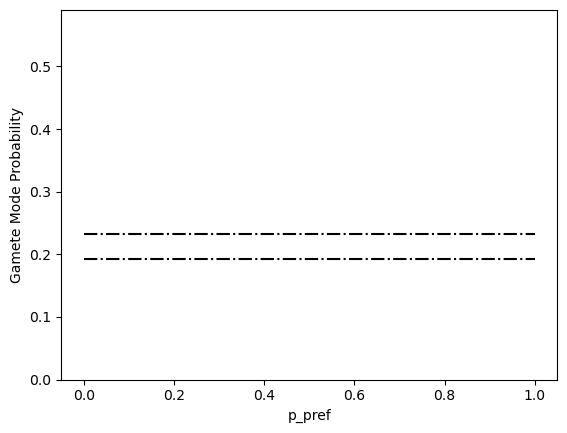

In [19]:
x = np.linspace(0,1, 10)
y_prox_iijj_down = [prox_iijj.subs(rp,(1 - (1 - 2 * r)**(1/2))/2)\
                                                           .subs(qp,(1 - (1 - 2 * q)**(1/2))/2)\
                                                           .subs(vp,(1 - (1 - 2 * v)**(1/2))/2)\
                                                            .subs(r,1/2).subs(q,1/2).subs(v,1/2)\
                                                            .subs(t,2/3)\
                                                            .subs(ppc,1/4).subs(pmp,1/4).subs(pdm,1/4)\
                                                            .subs(p_pair,1 - item) for item in x]
y_prox_ijkl_down = [prox_ijkl.subs(rp,(1 - (1 - 2 * r)**(1/2))/2)\
                                                           .subs(qp,(1 - (1 - 2 * q)**(1/2))/2)\
                                                           .subs(vp,(1 - (1 - 2 * v)**(1/2))/2)\
                                                            .subs(r,1/2).subs(q,1/2).subs(v,1/2)\
                                                            .subs(t,2/3)\
                                                            .subs(ppc,1/4).subs(pmp,1/4).subs(pdm,1/4)\
                                                            .subs(p_pair,1 - item) for item in x]

plt.plot(x, y_prox_iijj_down,'k-.')
plt.plot(x, y_prox_ijkl_down,'k-.')
plt.ylim(0,0.59)
plt.xlabel('p_pref')
plt.ylabel('Gamete Mode Probability')

plt.show()